In [1]:
# general modules
import os, sys, pprint, itertools
import numpy as np

# custom modules
sys.path.append('..')
from physion.dataviz.show_data import MultimodalData
from physion.dataviz.datavyz.datavyz import graph_env_manuscript as ge

Experiment & Visual-Stim modules disabled !


In [167]:
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'curated', '2022_03_01-15-25-17.nwb')
tlim = [40,300]
data = MultimodalData(filename)

In [73]:
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'curated', '2022_03_01-15-25-17.nwb')
tlim = [100,300]
data = MultimodalData(filename)

In [79]:
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'curated', '2022_03_11-14-40-52.nwb')
tlim = [1700,1800]
data = MultimodalData(filename)

In [85]:
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'curated', '2022_04_20-12-36-15.nwb')
tlim = [1150,1250]
data = MultimodalData(filename)

In [2]:
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'curated', '2022_04_20-13-13-05.nwb')
tlim = [100,300]
data = MultimodalData(filename)

/home/yann.zerlaut/miniconda3/lib/python3.9/site-packages/pynwb/ophys.py:360: UserWarning: The second dimension of data does not match the length of rois, but instead the first does. Data is oriented incorrectly and should be transposed.
  warnings.warn("The second dimension of data does not match the length of rois, but instead the "
/home/yann.zerlaut/miniconda3/lib/python3.9/site-packages/pynwb/base.py:167: UserWarning: Length of data does not match length of timestamps. Your data may be transposed. Time should be on the 0th dimension
  warn("Length of data does not match length of timestamps. Your data may be transposed. Time should be on "



calculating dF/F with method "maximin" [...]

  ** all ROIs passed the positive F0 criterion ** 

-> dFoF calculus done !  (calculation took 0.3s)


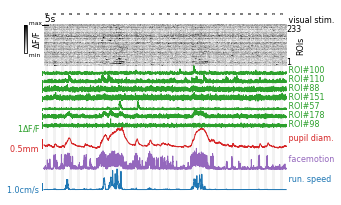

In [3]:
fig, _ = data.plot_raw_data(tlim, 
                  settings={'Locomotion':dict(fig_fraction=1, subsampling=1, color=ge.blue),
                            'FaceMotion':dict(fig_fraction=1, subsampling=1, color=ge.purple),
                            'Pupil':dict(fig_fraction=1, subsampling=1, color=ge.red),
                            'CaImaging':dict(fig_fraction=3, subsampling=1, 
                                             subquantity='dF/F', color=ge.green,
                                             roiIndices=[97, 177,56,150,87,109,99]),
                                             #roiIndices=np.random.choice(range(180),4)),
                            'CaImagingRaster':dict(fig_fraction=2, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   subquantity='dF/F'),
                            'VisualStim':dict(fig_fraction=0, color='black')},
                            Tbar=5, figsize=(2,4))
ge.save_on_desktop(fig)

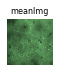

In [168]:
fig,_,_ = data.show_CaImaging_FOV(NL=4,cmap=ge.get_linear_colormap('k','lightgreen'))
ge.save_on_desktop(fig)

(<Figure size 663.307x305.008 with 2 Axes>, <AxesSubplot:>)

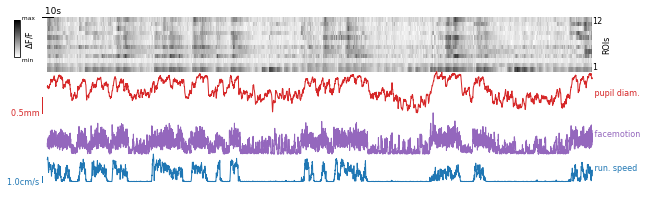

In [32]:
tlim = [800,1300]
Nmax = 3 # number of Ca traces with full trace
data.plot_raw_data(tlim, 
                  settings={'Locomotion':dict(fig_fraction=2, subsampling=3, color=ge.blue),
                            'FaceMotion':dict(fig_fraction=3, subsampling=3, color=ge.purple),
                            'Pupil':dict(fig_fraction=3, subsampling=3, color=ge.red),
                            #'CaImaging':dict(fig_fraction=4, subsampling=3, 
                            #                 subquantity='dF/F', color=ge.green,
                            #                 roiIndices=np.sort(np.random.choice(np.arange(np.sum(data.iscell)), 
                            #                                                     np.min([Nmax, data.iscell.sum()]), replace=False))),
                            'CaImagingRaster':dict(fig_fraction=4, subsampling=1,
                                                   roiIndices='all',
                                                   normalization='per-line',
                                                   subquantity='dF/F')},
                            Tbar=10, figsize=(3,4))


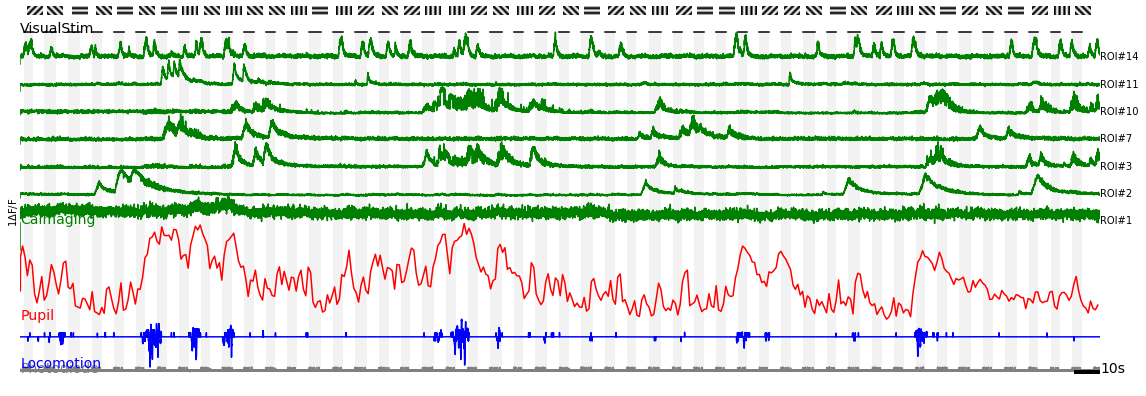

In [3]:
# general modules
import pynwb, os, sys
import numpy as np
import matplotlib.pylab as plt

# custom modules
sys.path.append('..')
from physion.dataviz import plots
from physion.analysis.read_NWB import read as read_NWB
from physion.Ca_imaging.tools import compute_CaImaging_trace
from physion.dataviz.tools import *

from physion.visual_stim.psychopy_code.stimuli import build_stim

# we define a data object fitting this analysis purpose
class Data:
    
    def __init__(self, filename, verbose=False):
        """ opens data file """
        read_NWB(self, filename, verbose=verbose)
        self.metadata['load_from_protocol_data'], self.metadata['no-window'] = True, True
        self.visual_stim = build_stim(self.metadata, no_psychopy=True)
        
    def add_Photodiode(self, tlim, ax,
                       fig_fraction_start=0., fig_fraction=1., subsampling=10, color='grey'):
        i1, i2 = convert_times_to_indices(*tlim, self.nwbfile.acquisition['Photodiode-Signal'])
        x = convert_index_to_time(range(i1,i2), self.nwbfile.acquisition['Photodiode-Signal'])[::subsampling]
        y = self.nwbfile.acquisition['Photodiode-Signal'].data[i1:i2][::subsampling]
        ax.plot(x, (y-y.min())/(y.max()-y.min())*fig_fraction+fig_fraction_start, color=color)
        
    def add_Locomotion(self, tlim, ax,
                       fig_fraction_start=0., fig_fraction=1., subsampling=10, color='red'):
        i1, i2 = convert_times_to_indices(*tlim, self.nwbfile.acquisition['Running-Speed'])
        x = convert_index_to_time(range(i1,i2), self.nwbfile.acquisition['Running-Speed'])[::subsampling]
        y = self.nwbfile.acquisition['Running-Speed'].data[i1:i2][::subsampling]
        ax.plot(x, (y-y.min())/(y.max()-y.min())*fig_fraction+fig_fraction_start, color=color)
        
    def add_Pupil(self, tlim, ax,
                  fig_fraction_start=0., fig_fraction=1., subsampling=1, color='red'):
        i1, i2 = convert_times_to_indices(*tlim, self.nwbfile.processing['Pupil'].data_interfaces['cx'])
        t = self.nwbfile.processing['Pupil'].data_interfaces['sx'].timestamps[i1:i2]
        diameter = self.nwbfile.processing['Pupil'].data_interfaces['sx'].data[i1:i2]*\
                               self.nwbfile.processing['Pupil'].data_interfaces['sy'].data[i1:i2]
        x, y = t[::subsampling], diameter[::subsampling]
        ax.plot(x, (y-y.min())/(y.max()-y.min())*fig_fraction+fig_fraction_start, color=color)
    
    def add_CaImaging(self, tlim, ax,
                      fig_fraction_start=0., fig_fraction=1., color='green',
                      quantity='CaImaging', subquantity='Fluorescence', roiIndices=[0]):
        i1 = convert_time_to_index(tlim[0], self.Neuropil, axis=1)
        i2 = convert_time_to_index(tlim[1], self.Neuropil, axis=1)
        tt = self.Neuropil.timestamps[np.arange(i1,i2)]
        for n, ir in enumerate(roiIndices):
            y = compute_CaImaging_trace(self, subquantity, [ir]).sum(axis=0)[np.arange(i1,i2)]
            ax.plot(tt, (y-y.min())/(y.max()-y.min())*fig_fraction/len(roiIndices)+\
                    n*fig_fraction/len(roiIndices)+fig_fraction_start, color=color)
            ax.plot(tlim[0]*np.ones(2), np.arange(2)*(1.-y.min())/(y.max()-y.min())*fig_fraction/len(roiIndices)+\
                    n*fig_fraction/len(roiIndices)+fig_fraction_start, color=color)
            ax.annotate('ROI#%i'%(ir+1), (tlim[1], n*fig_fraction/len(roiIndices)+fig_fraction_start))
        ax.annotate('1$\Delta$F/F', (tlim[0], fig_fraction_start), ha='right', rotation=90)
        
    def add_VisualStim(self, tlim, ax,
                       fig_fraction_start=0., fig_fraction=1., size=.1, color='k'):
        cond = (self.nwbfile.stimulus['time_start_realigned'].data[:]>tlim[0]) &\
            (self.nwbfile.stimulus['time_stop_realigned'].data[:]<tlim[1])
        ylevel = fig_fraction_start+fig_fraction
        sx, sy = self.visual_stim.screen['resolution']
        for i in np.arange(self.nwbfile.stimulus['time_start_realigned'].num_samples)[cond]:
            tstart = self.nwbfile.stimulus['time_start_realigned'].data[i]
            tstop = self.nwbfile.stimulus['time_stop_realigned'].data[i]
            ax.plot([tstart, tstop], [ylevel, ylevel], color=color)
            ax.fill_between([tstart, tstop], [0,0], np.zeros(2)+ylevel, lw=0, alpha=0.05, color=color)
            axi = plt.axes([(tstart-tlim[0])/(tlim[1]-tlim[0]), 0.99, size, size])#size*sx/sy, size])
            self.visual_stim.show_frame(i, ax=axi,label=None)
            
    
    def show_sample(self, 
                    tlim=[0,100],
                    settings={'Photodiode':dict(fig_fraction=.1, subsampling=10, color='grey'),
                              'Locomotion':dict(fig_fraction=1, subsampling=10, color='b'),
                              'Pupil':dict(fig_fraction=2, subsampling=10, color='red'),
                              'CaImaging':dict(fig_fraction=4, 
                                    quantity='CaImaging', subquantity='Fluorescence', color='green',
                                               roiIndices=[2, 6, 9, 10, 13, 15, 16, 17, 38, 41]),
                              'VisualStim':dict(fig_fraction=0, size=0.02, color='black')},                    
                    figsize=(15,6), Tbar=20,
                    ax=None):
        if ax is None:
            fig, ax = plt.subplots(1, figsize=(15,6))
        fig_fraction_full, fstart = np.sum([settings[key]['fig_fraction'] for key in settings]), 0
        for key in settings:
            settings[key]['fig_fraction_start'] = fstart
            settings[key]['fig_fraction'] = settings[key]['fig_fraction']/fig_fraction_full
            fstart += settings[key]['fig_fraction']
        for key in settings:
            getattr(self, 'add_%s' % key)(tlim, ax, **settings[key])
            ax.annotate(key, (tlim[0], settings[key]['fig_fraction_start']), 
                        color=settings[key]['color'], fontsize=14)
        ax.axis('off')
        ax.set_xlim(tlim)
        ax.plot([tlim[1]-Tbar, tlim[1]], [0,0], lw=4, color='k')
        ax.annotate(str(Tbar)+'s', [tlim[1], 0], color='k', fontsize=14)
        
        
fig, ax = plt.subplots(1, figsize=(15,6))   
plt.subplots_adjust(left=0, right=1., top=.99)


FILENAMES = os.listdir(os.path.join(os.path.expanduser('~'), 'DATA', 'NDNF+'))
filename = os.path.join(os.path.expanduser('~'), 'DATA', 'NDNF+', FILENAMES[0])
                       
data = Data(filename)
data.show_sample([0, 450], 
                 settings={'Photodiode':dict(fig_fraction=.1, subsampling=10, color='grey'),
                           'Locomotion':dict(fig_fraction=1, subsampling=10, color='b'),
                           'Pupil':dict(fig_fraction=2, subsampling=10, color='red'),
                           'CaImaging':dict(fig_fraction=4, 
                                    quantity='CaImaging', subquantity='Fluorescence', color='green',
                                               roiIndices=[0, 1, 2, 6, 9, 10, 13]),
                           'VisualStim':dict(fig_fraction=0, size=0.02, color='black')},                    
                  ax=ax, Tbar=10)
#fig.savefig('/home/yann/Desktop/data2/raw-data-4.svg')